In [54]:
# import dependencies

import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
import csv
import numpy as np
from pprint import pprint
import requests
from api_keys import geoapify_key

In [2]:
# Read the census data into a Pandas DataFrame

# file_path = Path("Resources/Oakville_2021.csv")
# data = pd.read_csv(file_path, encoding="ISO-8859-1", low_memory=True)
file_2021 = Path('Resources/CensusProfile_Oakville2021.csv')
data_2021 = pd.read_csv(file_2021, encoding="ISO-8859-1", low_memory=True)
file_2016 = Path('Resources/CensusProfile_Oakville2016.csv')
data_2016 = pd.read_csv(file_2016, encoding="ISO-8859-1", low_memory=True)

# Combine the data into a single DataFrame
combined_df = pd.concat([data_2021, data_2016], axis=1)

# Display the data table for preview
combined_df = combined_df[['Characteristic', '2021', 'Characteristics', '2016']]
combined_df.sample(20)

#data_2021.head()
#data_2016.head()


,Characteristic,2021,Characteristics,2016
51,1 person,13425.0,1 person,11760.0
60,Median after-tax income of household in 2020...,108000.0,Median after-tax income of households in 201...,95035.0
24,65 to 69 years,9665.0,65 to 69 years,8630.0
155,One-maintainer household,32085.0,1 household maintainer,34470.0
178,"Total - Tenant households in non-farm, non-res...",16530.0,Total - Tenant households in non-farm; non-res...,12135.0
94,"$125,000 to $149,999",6580.0,$125;000 to $149;999,5905.0
45,Apartment or flat in a duplex,950.0,Apartment or flat in a duplex,955.0
54,4 persons,16660.0,4 persons,15560.0
101,"$15,000 to $19,999",815.0,$15;000 to $19;999,1350.0
32,100 years and over,40.0,100 years and over,40.0


In [3]:
## Population

In [99]:
#Population

pop_2016 = combined_df.iloc[0]['2016'].astype(int)
pop_2021 = combined_df.iloc[0]['2021'].astype(int)

print(f"{pop_2016}, {pop_2021}")

#print(f"{combined_df.iloc[0]['2021'].astype(int)}, {combined_df.iloc[0]['2016'].astype(int)}")


193832, 213759


In [98]:
#Create a DataFrame for Population:

Oakville_pop = pd.DataFrame({'City': ['Oakville', 'Oakville' ],
                          'Year': ['2016',' 2021'],
                          'Population': [pop_2016, pop_2021]
                         })
Oakville_df = Oakville_pop.set_index(['City', 'Year'])
Oakville_df

Population
City     Year             
Oakville 2016       193832
          2021      213759

In [100]:
#No. of Households
print(f"{combined_df.iloc[58]['2016'].astype(int)}, {combined_df.iloc[58]['2021'].astype(int)}")

66270, 73560


In [101]:
#Median Household Income
print(f"{combined_df.iloc[59]['2016'].astype(int)}, {combined_df.iloc[59]['2021'].astype(int)}")

113666, 128000


In [102]:
Oakville_df["No. of Households"] = [combined_df.iloc[58]['2016'].astype(int), combined_df.iloc[58]['2021'].astype(int)]
Oakville_df

Population  No. of Households
City     Year                                
Oakville 2016       193832              66270
          2021      213759              73560

In [103]:
Oakville_df["Median Household Income"] = [combined_df.iloc[59]['2016'].astype(int), combined_df.iloc[59]['2021'].astype(int)]
Oakville_df

Population  No. of Households  Median Household Income
City     Year                                                         
Oakville 2016       193832              66270                   113666
          2021      213759              73560                   128000

In [104]:
#Unemployment Rate
unemp_2016 = combined_df.iloc[190]['2016'].astype(float)
unemp_2016
unemp_2021 = combined_df.iloc[190]['2021'].astype(float)
unemp_2021

print(f"{unemp_2016}, {unemp_2021}")
#print(f"{combined_df.iloc[190]['2021'].astype(float)}, {combined_df.iloc[190]['2016'].astype(float)}")

6.9, 11.7


In [105]:
Oakville_df["Unemployment Rate (%)"] = [combined_df.iloc[190]['2016'].astype(float), combined_df.iloc[190]['2021'].astype(float)]
Oakville_df

Population  No. of Households  Median Household Income  \
City     Year                                                            
Oakville 2016       193832              66270                   113666   
          2021      213759              73560                   128000   

                Unemployment Rate (%)  
City     Year                          
Oakville 2016                     6.9  
          2021                   11.7

In [12]:
#Property Tax Rate

#Listing file path
tax_file = Path("Resources/Oakville_tax-summary-historical-tax-rates.csv")

#Read the csv file
tax_df = pd.read_csv(tax_file, encoding = "ISO-8859-1")
tax_df

,Year,Type,Town,Management,Services,General,Region Total,Education,Total
0,2016,Residential,0.33%,0.02%,0.11%,0.18%,0.31%,0.19%,0.83%
1,2016,Multi-Residential,0.75%,0.04%,0.26%,0.40%,0.69%,0.19%,1.63%
2,2016,Commercial,0.48%,0.03%,0.17%,0.26%,0.45%,0.87%,1.80%
3,2016,land or vacant land,0.34%,0.02%,0.12%,0.18%,0.31%,0.61%,1.26%
4,2017,Residential,0.32%,0.02%,0.11%,0.17%,0.30%,0.18%,0.80%
5,2017,Multi-Residential,0.65%,0.03%,0.22%,0.34%,0.59%,0.18%,1.42%
6,2017,Commercial,0.47%,0.02%,0.16%,0.25%,0.43%,0.86%,1.76%
7,2017,land or vacant land,0.33%,0.02%,0.11%,0.17%,0.30%,0.60%,1.23%
8,2018,Residential,0.31%,0.02%,0.11%,0.16%,0.28%,0.17%,0.77%
9,2018,Multi-Residential,0.63%,0.03%,0.21%,0.32%,0.57%,0.17%,1.36%


In [106]:
oakville_tax_2016 = tax_df.iloc[0]['Total']
oakville_tax_2016
oakville_tax_2021 = tax_df.iloc[23]['Total']
oakville_tax_2021

print(f"{oakville_tax_2016}, {oakville_tax_2021}")

0.83%, 0.72%


In [107]:
Oakville_df["Property Tax Rate"] = [oakville_tax_2016, oakville_tax_2021]
Oakville_df

Population  No. of Households  Median Household Income  \
City     Year                                                            
Oakville 2016       193832              66270                   113666   
          2021      213759              73560                   128000   

                Unemployment Rate (%) Property Tax Rate  
City     Year                                            
Oakville 2016                     6.9             0.83%  
          2021                   11.7             0.72%

In [88]:
#Housing Price

#Median Sale Price
file1 = Path("Resources/Oakville_Median_Sale_Price.csv")

#Read the csv file
median_sale_price = pd.read_csv(file1, encoding = "UTF-8")
median_sale_price

,Primary Year,Median Sale Price
0,2016,"$920,000"
1,2017,"$1,056,000"
2,2018,"$909,500"
3,2019,"$935,000"
4,2020,"$1,125,000"
5,2021,"$1,387,500"
6,2022,"$1,450,944"
7,2023,"$1,431,000"


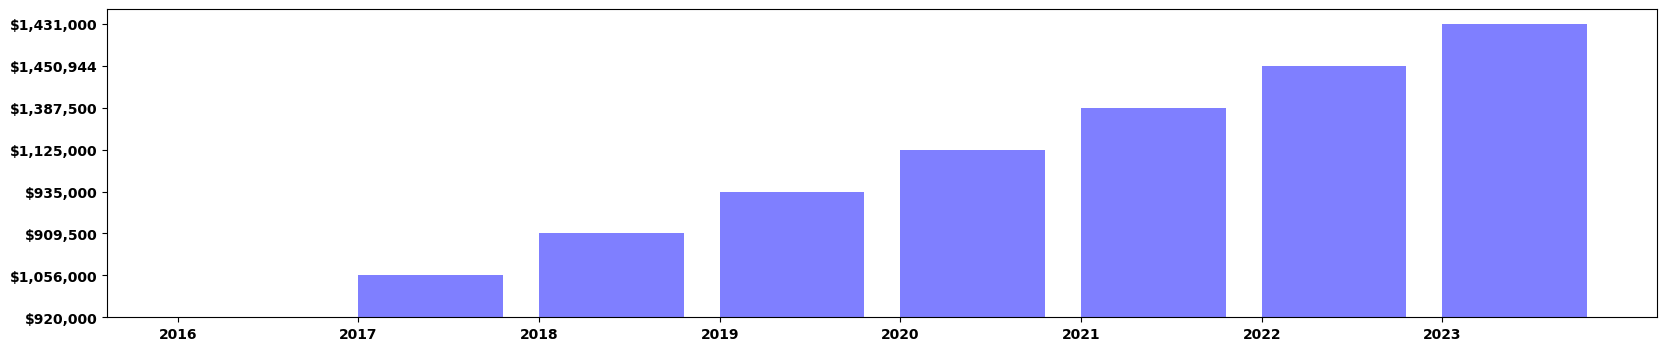

In [94]:
year = ["2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023"]
# Median Sale Price = [214.7, 564.4, 416.5, 466.7, 350.6]

# Set x axis and tick locations
x_axis = year
#tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(20,4))
plt.bar(x_axis, median_sale_price["Median Sale Price"], color='b', alpha=0.5, align="edge")
#plt.xticks(tick_locations, median_sale_price["Primary Year"], rotation="vertical")
plt.show()


In [95]:
#Avg Sale Price
file2 = Path("Resources/Oakville_Avg_Sale_Price.csv")

#Read the csv file
avg_sale_price = pd.read_csv(file2, encoding = "UTF-8")
avg_sale_price

,Primary Year,Average Sale Price
0,2016,"$1,063,117"
1,2017,"$1,212,234"
2,2018,"$1,078,016"
3,2019,"$1,088,524"
4,2020,"$1,297,398"
5,2021,"$1,579,928"
6,2022,"$1,671,707"
7,2023,"$1,620,292"


In [96]:
#Median Rent Price
file3 = Path("Resources/Oakville_Median_Rental_Price.csv")

#Read the csv file
median_rent_price = pd.read_csv(file3, encoding = "UTF-8")
median_rent_price

,Primary Year,Median Rental Price
0,2016,"$2,588"
1,2017,"$2,600"
2,2018,"$2,600"
3,2019,"$2,800"
4,2020,"$2,800"
5,2021,"$3,000"
6,2022,"$3,200"
7,2023,"$3,300"


In [97]:
#Avg Rent Price
file4 = Path("Resources/Oakville_Avg_Rental_Price.csv")

#Read the csv file
avg_rent_price = pd.read_csv(file4, encoding = "UTF-8")
avg_rent_price

,Primary Year,Average Rental Price
0,2016,"$3,154"
1,2017,"$3,022"
2,2018,"$2,965"
3,2019,"$3,175"
4,2020,"$3,170"
5,2021,"$3,363"
6,2022,"$3,656"
7,2023,"$3,709"


In [20]:
med_sale_2016 = median_sale_price.iloc[0]['Median Sale Price']
med_sale_2016

'$920,000'

In [21]:
avg_sale_2016 = avg_sale_price.iloc[0]['Average Sale Price']
avg_sale_2016

'$1,063,117'

In [22]:
med_sale_2021 = median_sale_price.iloc[5]['Median Sale Price']
med_sale_2021

'$1,387,500'

In [23]:
avg_sale_2021 = avg_sale_price.iloc[5]['Average Sale Price']
avg_sale_2021

'$1,579,928'

In [24]:
med_rental_2016 = median_rent_price.iloc[0]['Median Rental Price']
med_rental_2016

'$2,588'

In [25]:
avg_rental_2016 = avg_rent_price.iloc[0]['Average Rental Price']
avg_rental_2016

'$3,154'

In [26]:
med_rental_2021 = median_rent_price.iloc[5]['Median Rental Price']
med_rental_2021

'$3,000'

In [27]:
avg_rental_2021 = avg_rent_price.iloc[5]['Average Rental Price']
avg_rental_2021

'$3,363'

In [108]:
Oakville_df["Average Sale Price"] = [avg_sale_2016, avg_sale_2021]
Oakville_df

Population  No. of Households  Median Household Income  \
City     Year                                                            
Oakville 2016       193832              66270                   113666   
          2021      213759              73560                   128000   

                Unemployment Rate (%) Property Tax Rate Average Sale Price  
City     Year                                                               
Oakville 2016                     6.9             0.83%         $1,063,117  
          2021                   11.7             0.72%         $1,579,928

In [109]:
Oakville_df["Median Sale Price"] = [med_sale_2016, med_sale_2021]
Oakville_df

Population  No. of Households  Median Household Income  \
City     Year                                                            
Oakville 2016       193832              66270                   113666   
          2021      213759              73560                   128000   

                Unemployment Rate (%) Property Tax Rate Average Sale Price  \
City     Year                                                                
Oakville 2016                     6.9             0.83%         $1,063,117   
          2021                   11.7             0.72%         $1,579,928   

               Median Sale Price  
City     Year                     
Oakville 2016           $920,000  
          2021        $1,387,500

In [110]:
Oakville_df["Average Rental Price"] = [avg_rental_2016, avg_rental_2021]
Oakville_df

Population  No. of Households  Median Household Income  \
City     Year                                                            
Oakville 2016       193832              66270                   113666   
          2021      213759              73560                   128000   

                Unemployment Rate (%) Property Tax Rate Average Sale Price  \
City     Year                                                                
Oakville 2016                     6.9             0.83%         $1,063,117   
          2021                   11.7             0.72%         $1,579,928   

               Median Sale Price Average Rental Price  
City     Year                                          
Oakville 2016           $920,000               $3,154  
          2021        $1,387,500               $3,363

In [111]:
Oakville_df["Median Rental Price"] = [med_rental_2016, med_rental_2021]
Oakville_df

Population  No. of Households  Median Household Income  \
City     Year                                                            
Oakville 2016       193832              66270                   113666   
          2021      213759              73560                   128000   

                Unemployment Rate (%) Property Tax Rate Average Sale Price  \
City     Year                                                                
Oakville 2016                     6.9             0.83%         $1,063,117   
          2021                   11.7             0.72%         $1,579,928   

               Median Sale Price Average Rental Price Median Rental Price  
City     Year                                                              
Oakville 2016           $920,000               $3,154              $2,588  
          2021        $1,387,500               $3,363              $3,000

In [32]:
#New Builds Completed
file5 = Path("Resources/Oakville_New_Builds_Completion.csv")

#Read the csv file
new_completed = pd.read_csv(file5, encoding = "ISO-8859-1", low_memory=True)
new_completed

,Year,Single,Semi-Detached,Row,Apartment,All
0,1990,553,6,452,54,"1,065"
1,1991,454,0,263,234,951
2,1992,640,152,388,434,"1,614"
3,1993,448,130,116,0,694
4,1994,515,80,230,141,966
5,1995,424,24,305,59,812
6,1996,387,8,176,0,571
7,1997,733,130,347,22,"1,232"
8,1998,560,64,152,0,776
9,1999,"1,201",120,215,40,"1,576"


In [33]:
new_completed_2016 = new_completed.iloc[26]['All']
new_completed_2021 = new_completed.iloc[31]['All']
new_completed_df = print(new_completed_2016, new_completed_2021)

1,791 1,824


In [34]:
#New Builds Completed
file6 = Path("Resources/Oakville_under_construction.csv")

#Read the csv file
new_under_construction = pd.read_csv(file6, encoding = "ISO-8859-1", low_memory=True)
new_under_construction

,Year,Single,Semi-Detached,Row,Apartment,All
0,1990,409,0,177,381,967
1,1991,425,52,149,463,"1,089"
2,1992,127,28,64,0,219
3,1993,291,32,161,141,625
4,1994,297,22,305,59,683
5,1995,212,6,145,0,363
6,1996,302,24,280,22,628
7,1997,370,56,142,0,568
8,1998,615,98,239,0,952
9,1999,682,184,312,102,"1,280"


In [35]:
new_under_construction_2016 = new_under_construction.iloc[26]['All']
new_under_construction_2021 = new_under_construction.iloc[31]['All']
new_under_construction_df = print(new_under_construction_2016, new_under_construction_2021)

2,437 3,193


In [112]:
Oakville_df["New Builds"] = [new_completed_2016, new_completed_2021]
Oakville_df

Population  No. of Households  Median Household Income  \
City     Year                                                            
Oakville 2016       193832              66270                   113666   
          2021      213759              73560                   128000   

                Unemployment Rate (%) Property Tax Rate Average Sale Price  \
City     Year                                                                
Oakville 2016                     6.9             0.83%         $1,063,117   
          2021                   11.7             0.72%         $1,579,928   

               Median Sale Price Average Rental Price Median Rental Price  \
City     Year                                                               
Oakville 2016           $920,000               $3,154              $2,588   
          2021        $1,387,500               $3,363              $3,000   

               New Builds  
City     Year              
Oakville 2016       1,791  
          2021      1,824

In [113]:
Oakville_df["Under Construction"] = [new_under_construction_2016, new_under_construction_2021]
Oakville_df

Population  No. of Households  Median Household Income  \
City     Year                                                            
Oakville 2016       193832              66270                   113666   
          2021      213759              73560                   128000   

                Unemployment Rate (%) Property Tax Rate Average Sale Price  \
City     Year                                                                
Oakville 2016                     6.9             0.83%         $1,063,117   
          2021                   11.7             0.72%         $1,579,928   

               Median Sale Price Average Rental Price Median Rental Price  \
City     Year                                                               
Oakville 2016           $920,000               $3,154              $2,588   
          2021        $1,387,500               $3,363              $3,000   

               New Builds Under Construction  
City     Year                                 
Oakville 2016       1,791              2,437  
          2021      1,824              3,193

In [38]:
#Owned houses

own_2016 = combined_df.iloc[118]['2016'].astype(int)
own_2021 = combined_df.iloc[118]['2021'].astype(int)

print(f"{own_2016}, {own_2021}")

57025, 54130


In [114]:
#Rented houses

rented_2016 = combined_df.iloc[119]['2016'].astype(int)
rented_2021 = combined_df.iloc[119]['2021'].astype(int)

print(f"{rented_2016}, {rented_2021}")

12135, 16530


In [115]:
Oakville_df["No. of Owned Houses"] = [own_2016, own_2021]
Oakville_df

Population  No. of Households  Median Household Income  \
City     Year                                                            
Oakville 2016       193832              66270                   113666   
          2021      213759              73560                   128000   

                Unemployment Rate (%) Property Tax Rate Average Sale Price  \
City     Year                                                                
Oakville 2016                     6.9             0.83%         $1,063,117   
          2021                   11.7             0.72%         $1,579,928   

               Median Sale Price Average Rental Price Median Rental Price  \
City     Year                                                               
Oakville 2016           $920,000               $3,154              $2,588   
          2021        $1,387,500               $3,363              $3,000   

               New Builds Under Construction  No. of Owned Houses  
City     Year                                                      
Oakville 2016       1,791              2,437                54130  
          2021      1,824              3,193                57025

In [116]:
Oakville_df["No. of Rented Houses"] = [rented_2016, rented_2021]
Oakville_df

Population  No. of Households  Median Household Income  \
City     Year                                                            
Oakville 2016       193832              66270                   113666   
          2021      213759              73560                   128000   

                Unemployment Rate (%) Property Tax Rate Average Sale Price  \
City     Year                                                                
Oakville 2016                     6.9             0.83%         $1,063,117   
          2021                   11.7             0.72%         $1,579,928   

               Median Sale Price Average Rental Price Median Rental Price  \
City     Year                                                               
Oakville 2016           $920,000               $3,154              $2,588   
          2021        $1,387,500               $3,363              $3,000   

               New Builds Under Construction  No. of Owned Houses  \
City     Year                                                       
Oakville 2016       1,791              2,437                54130   
          2021      1,824              3,193                57025   

                No. of Rented Houses  
City     Year                         
Oakville 2016                  12135  
          2021                 16530

In [117]:
#Create an Output file

Oakville_df.to_csv('Output/Oakville_df.csv')
Oakville_df

Population  No. of Households  Median Household Income  \
City     Year                                                            
Oakville 2016       193832              66270                   113666   
          2021      213759              73560                   128000   

                Unemployment Rate (%) Property Tax Rate Average Sale Price  \
City     Year                                                                
Oakville 2016                     6.9             0.83%         $1,063,117   
          2021                   11.7             0.72%         $1,579,928   

               Median Sale Price Average Rental Price Median Rental Price  \
City     Year                                                               
Oakville 2016           $920,000               $3,154              $2,588   
          2021        $1,387,500               $3,363              $3,000   

               New Builds Under Construction  No. of Owned Houses  \
City     Year                                                       
Oakville 2016       1,791              2,437                54130   
          2021      1,824              3,193                57025   

                No. of Rented Houses  
City     Year                         
Oakville 2016                  12135  
          2021                 16530

In [43]:
#Schools
file7 = Path("Resources/public_school_list.csv")

#Read the csv file
public_schools = pd.read_csv(file7, encoding = "ISO-8859-1", low_memory=True)
public_schools

,Region,Board Number,Board Name,Board Type,Board Language,School Number,School Name,School Level,School Language,School Type,...,City,Province,Postal Code,Phone,Fax,Grade Range,Date Open,Email,Website,Board Website
0,North Region,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),English,902344,Algoma Education Connection Secondary School,Secondary,English,Public,...,Sault Ste Marie,Ontario,P6B4J4,705-945-7194,705-945-7173,12-Sep,07/09/2010,kahtavg@adsb.on.ca,http://www.adsb.on.ca,http://www.adsb.on.ca
1,North Region,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),English,19186,Anna McCrea Public School,Elementary,English,Public,...,Sault Ste Marie,Ontario,P6A3M7,705-945-7106,705-945-7221,JK-8,01/09/1969,lucioc@adsb.on.ca,http://www.adsb.on.ca/sites/schools/amc/defaul...,http://www.adsb.on.ca
2,North Region,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),English,43362,Ben R McMullin Public School,Elementary,English,Public,...,Sault Ste Marie,Ontario,P6B5K2,705-945-7108,705-945-7205,JK-8,01/09/1969,kennedj@adsb.on.ca,http://www.adsb.on.ca/sites/schools/brm/defaul...,http://www.adsb.on.ca
3,North Region,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),English,54542,Blind River Public School,Elementary,English,Public,...,Blind River,Ontario,P0R1B0,705-356-7752,705-356-0271,JK-8,01/09/1969,baillas@adsb.on.ca,http://www.adsb.on.ca/sites/schools/bli/defaul...,http://www.adsb.on.ca
4,North Region,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),English,490822,Boreal French Immersion Public School,Elementary,English,Public,...,Sault Ste Marie,Ontario,P6B4H6,705-945-7149,705-945-7349,JK-8,01/09/1969,vazc@adsb.on.ca,http://rosedale.adsb.on.ca/,http://www.adsb.on.ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5803,Central Region,B66095,York Region DSB,Pub Dist Sch Brd (E/F),English,999970,York Region B of E Continuing Education Night ...,Secondary,English,Public,...,RICHMOND HILL,Ontario,L4E4R1,905-884-3434,905-884-3604,No Grades Applicable,30/01/2014,NaN,NaN,http://www.yrdsb.ca
5804,Central Region,B66095,York Region DSB,Pub Dist Sch Brd (E/F),English,999547,York Region DSB Night School e-Learning,Secondary,English,Public,...,Richmond Hill,Ontario,L4E1R1,905-851-2843,NaN,12-Sep,01/09/1983,NaN,NaN,http://www.yrdsb.ca
5805,Central Region,B66095,York Region DSB,Pub Dist Sch Brd (E/F),English,980498,York Region DSB Summer School,Secondary,English,Public,...,Richmond Hill,Ontario,L4E1R1,905-731-9557,NaN,No Grades Applicable,01/06/1982,NaN,NaN,http://www.yrdsb.ca
5806,Central Region,B66095,York Region DSB,Pub Dist Sch Brd (E/F),English,981486,York Region DSB Summer School e-Learning,Secondary,English,Public,...,Richmond Hill,Ontario,L4E1R1,905-884-3434,905-884-3604,No Grades Applicable,01/09/1999,NaN,NaN,http://www.yrdsb.ca


In [44]:
#Oakville Public Schools
oakville_public_schools = public_schools.loc[(public_schools['School Type']=='Public') & (public_schools['City']=='Oakville')]
oakville_public_schools


,Region,Board Number,Board Name,Board Type,Board Language,School Number,School Name,School Level,School Language,School Type,...,City,Province,Postal Code,Phone,Fax,Grade Range,Date Open,Email,Website,Board Website
341,Toronto Region,B66303,CS Viamonde,Pub Dist Sch Brd (E/F),French,914723,Ãcole secondaire GaÃ©tan Gervais,Secondary,French,Public,...,Oakville,Ontario,L6H1H9,289-529-0065,NaN,12-Sep,01/09/2011,NaN,http://gaetangervais.csviamonde.ca,http://www.csviamonde.ca
364,Toronto Region,B66303,CS Viamonde,Pub Dist Sch Brd (E/F),French,572312,Ãcole Ã©lÃ©mentaire Gaetan-Gervais,Elementary,French,Public,...,Oakville,Ontario,L6H1H9,289-529-0065,905-842-7695,08-Jul,03/09/2013,NaN,http://csviamonde.ca/ecoles/gaetangervais,http://www.csviamonde.ca
390,Toronto Region,B66303,CS Viamonde,Pub Dist Sch Brd (E/F),French,619655,Ãcole Ã©lÃ©mentaire Patricia-Picknell,Elementary,French,Public,...,Oakville,Ontario,L6L1X6,905-465-0512,905-465-0514,JK-6,01/09/1969,NaN,http://patriciapicknell.csviamonde.ca/,http://www.csviamonde.ca
403,Toronto Region,B66303,CS Viamonde,Pub Dist Sch Brd (E/F),French,426502,Ãcole Ã©lÃ©mentaire du ChÃªne,Elementary,French,Public,...,Oakville,Ontario,L6H1B8,905-815-8900,NaN,JK-6,01/09/2011,NaN,http://duchene.csviamonde.ca/,http://www.csviamonde.ca
1721,Central Region,B66133,Halton DSB,Pub Dist Sch Brd (E/F),English,779,Abbey Lane Public School,Elementary,English,Public,...,Oakville,Ontario,L6M1S4,905-827-5552,905-827-2752,JK-8,01/09/1986,abbps@hdsb.ca,http://abb.hdsb.ca/,http://www.hdsb.ca/
1722,Central Region,B66133,Halton DSB,Pub Dist Sch Brd (E/F),English,913715,Abbey Park High School,Secondary,English,Public,...,Oakville,Ontario,L6M2G5,905-827-4101,905-825-5265,12-Sep,01/09/2004,aphs@hdsb.ca,http://aph.hdsb.ca/,http://www.hdsb.ca/
1732,Central Region,B66133,Halton DSB,Pub Dist Sch Brd (E/F),English,66249,Brookdale Public School,Elementary,English,Public,...,Oakville,Ontario,L6L2C3,905-827-2741,905-827-1496,JK-8,01/09/1969,brdps@hdsb.ca,http://brd.hdsb.ca/,http://www.hdsb.ca/
1739,Central Region,B66133,Halton DSB,Pub Dist Sch Brd (E/F),English,85898,Captain R. Wilson Public School,Elementary,English,Public,...,Oakville,Ontario,L6M4S7,905-465-3881,905-465-3194,JK-8,01/09/2004,crwps@hdsb.ca,https://sites.google.com/site/captainrwilsonps/,http://www.hdsb.ca/
1747,Central Region,B66133,Halton DSB,Pub Dist Sch Brd (E/F),English,179950,Dr. David R. Williams Public School,Elementary,English,Public,...,Oakville,Ontario,L6H7C5,NaN,NaN,JK-8,08/09/2020,NaN,NaN,http://www.hdsb.ca/
1749,Central Region,B66133,Halton DSB,Pub Dist Sch Brd (E/F),English,156469,E J James Public School,Elementary,English,Public,...,Oakville,Ontario,L6J4M6,905-845-2015,NaN,08-Jan,01/09/1969,ejjps@hdsb.ca,http://ejj.hdsb.ca,http://www.hdsb.ca/


In [45]:
#Count of Oakville Public Schools
oakville_public_schools_count = len(oakville_public_schools)
oakville_public_schools_count

39

In [46]:
oakville_catholic_schools = public_schools.loc[(public_schools['School Type']=='Catholic') & (public_schools['City']=='Oakville')]
oakville_catholic_schools

,Region,Board Number,Board Name,Board Type,Board Language,School Number,School Name,School Level,School Language,School Type,...,City,Province,Postal Code,Phone,Fax,Grade Range,Date Open,Email,Website,Board Website
419,Toronto Region,B67318,CS catholique MonAvenir,Cath Dist Sch Brd (E/F),French,839486,ÃIC Sainte-TrinitÃ©,Elementary,French,Catholic,...,Oakville,Ontario,L6M0R4,905-339-0812,905-469-2199,08-Jul,01/08/2013,NaN,NaN,http://www.cscmonavenir.ca
432,Toronto Region,B67318,CS catholique MonAvenir,Cath Dist Sch Brd (E/F),French,865368,ÃSC Sainte-TrinitÃ©,Secondary,French,Catholic,...,Oakville,Ontario,L6M0R4,905-339-0812,905-469-2199,12-Sep,01/08/2013,NaN,NaN,http://www.cscmonavenir.ca
476,Toronto Region,B67318,CS catholique MonAvenir,Cath Dist Sch Brd (E/F),French,822000,ÃÃC Sainte-Marie-Oakville,Elementary,French,Catholic,...,Oakville,Ontario,L6K2X3,905-845-4472,905-845-2965,JK-8,30/06/1980,NaN,http://smo.csdccs.edu.on.ca,http://www.cscmonavenir.ca
1663,Central Region,B67113,Halton CDSB,Cath Dist Sch Brd (E/F),English,846774,Elementary - Online Catholic School,Elementary,English,Catholic,...,Oakville,Ontario,L6H1K4,NaN,NaN,JK-8,08/09/2020,NaN,NaN,hcdsb.org
1665,Central Region,B67113,Halton CDSB,Cath Dist Sch Brd (E/F),English,993670,Halton RCSSB Night School,Secondary,English,Catholic,...,Oakville,Ontario,L6K3W8,905-849-7555,905-849-9937,12-Sep,01/09/1989,NaN,NaN,hcdsb.org
1668,Central Region,B67113,Halton CDSB,Cath Dist Sch Brd (E/F),English,716936,Holy Family Catholic Elementary School,Elementary,English,Catholic,...,Oakville,Ontario,L6H2X8,905-845-6987,905-845-5061,JK-8,01/09/1981,NaN,http://schools.hcdsb.org/hlyf/default.aspx,hcdsb.org
1671,Central Region,B67113,Halton CDSB,Cath Dist Sch Brd (E/F),English,704300,Holy Trinity Catholic Secondary School,Secondary,English,Catholic,...,Oakville,Ontario,L6H5Z8,NaN,905-257-6262,12-Sep,01/09/2002,NaN,http://www.holytrinityoakville.ca/,hcdsb.org
1676,Central Region,B67113,Halton CDSB,Cath Dist Sch Brd (E/F),English,749052,Our Lady of Peace Catholic Elementary School,Elementary,English,Catholic,...,Oakville,Ontario,L6H5X5,905-257-2791,905-257-3402,JK-8,01/09/1993,NaN,http://schools.hcdsb.org/olpo/,hcdsb.org
1680,Central Region,B67113,Halton CDSB,Cath Dist Sch Brd (E/F),English,768936,St. Andrew Catholic Elementary School,Elementary,English,Catholic,...,Oakville,Ontario,L6H6G3,905-257-7102,905-257-7104,JK-8,01/09/1999,NaN,http://schools.hcdsb.org/andr/,hcdsb.org
1684,Central Region,B67113,Halton CDSB,Cath Dist Sch Brd (E/F),English,777650,St. Bernadette Catholic Elementary School,Elementary,English,Catholic,...,Oakville,Ontario,L6M3A4,905-827-7235,905-827-9035,JK-8,01/09/1989,NaN,http://schools.hcdsb.org/bern/,hcdsb.org


In [47]:
#Count of Oakville Catholic Schools
oakville_catholic_schools_count = len(oakville_catholic_schools)
oakville_catholic_schools_count

28

In [48]:
#Private Schools
file8 = Path("Resources/private_school_list.csv")

#Read the csv file
private_schools = pd.read_csv(file8, encoding = "ISO-8859-1", low_memory=True)
private_schools

,School Name,School Number,OSSD Credits Offered,Principal Name,Suite,PO Box,Street Address,City,Province,Postal Code,Telephone Number,Fax,Region,School Website,School Level,School Special Conditions Code,Program Type,Association Membership
0,3sixty Education,882408,Offers credits toward the Ontario Secondary Sc...,Sangeeta Kumar,101,NaN,141 Brunel Road,Mississauaga,Ontario,L4Z1X3,647-494-4340,647-494-4341,Central Region,www.3sixtyeducation.ca,Secondary,All Year Round,Site based only,No
1,A R S Armenian Private School,880655,Offers credits toward the Ontario Secondary Sc...,Raffi Sarkissian,NaN,NaN,50 Hallcrown Place,Toronto,Ontario,M2J1P7,416-491-2675,416-491-8559,Central Region,www.arsarmenianschool.ca,Elem/Sec,Not applicable,Site based only,No
2,A+ Academy of Advancement,885186,Offers credits toward the Ontario Secondary Sc...,Bushra Bushra Shahrin,200,NaN,2425 Eglinton Ave East Ave,Toronto,Ontario,M1K5G8,416-857-1654,416-907-3300,East Region,www.aplusacademy.ca,Elem/Sec,Not applicable,Online/Site Based,No
3,A21 Academy,669367,Offers credits toward the Ontario Secondary Sc...,Brevet Amy,NaN,NaN,8787 McHugh,Windsor,Ontario,N8S0A1,519-900-6021,NaN,West Region,www.A21Academy.com,Elem/Sec,Not applicable,Online/Site Based,OFIS
4,ABC Montessori Private School,877417,NaN,Raj Vekaria,NaN,NaN,305 Matheson Boulevard East,Mississauga,Ontario,L4Z1X8,905-568-8989,905-568-0958,Central Region,http://www.abcmontessori.com,Elementary,Not applicable,Site based only,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,Ãcole Internationale Kanata,668462,NaN,Rafik Bourezak,114,NaN,"105 Schneider Rd Unit 114, Kanata",Kanata,Ontario,K2K1Y3,613-262-1822,NaN,East Region,NaN,Elementary,Not applicable,Online Only,No
1582,Ãcole Notre-Dame du Mont Carmel,882721,NaN,Sylvie LeVasseur,230,NaN,225 DONALD ST,Ottawa,Ontario,K1K1N1,613-406-7455,NaN,East Region,http://www.ndmc.ca/,Elem/Sec,Not applicable,Site based only,No
1583,Ãcole Sainte-Marie MÃ¨re de Dieu,889485,Applied to offer credits toward the Ontario se...,Francis Ubertelli,NaN,NaN,20 Fairmont Ave,Ottawa,Ontario,K1Y2K2,613-371-8497,NaN,East Region,https://smmd.ca,Elem/Sec,Not applicable,Online/Site Based,No
1584,Ãcole Virtuelle Canadienne Inter-nations,882009,Applied to offer credits toward the Ontario se...,Ãlie Fotsing Sighano,NaN,NaN,595 Coyston drive,Oshawa/Durham,Ontario,L1K3C6,437-433-6700,NaN,East Region,https://www.ecolecanadienne-internations.com,Elem/Sec,All Year Round,Online Only,No


In [49]:
#Oakville Private Schools
oakville_private_schools = private_schools.loc[private_schools['City']=='Oakville']
oakville_private_schools

,School Name,School Number,OSSD Credits Offered,Principal Name,Suite,PO Box,Street Address,City,Province,Postal Code,Telephone Number,Fax,Region,School Website,School Level,School Special Conditions Code,Program Type,Association Membership
65,Al-Falah Islamic,878472,NaN,Ghousia Ali,NaN,NaN,391 Burnhamthorpe Rd E,Oakville,Ontario,L6H7B4,905-257-5782,NaN,Central Region,www.alfalahschool.ca,Elementary,Not applicable,Site based only,No
81,Alfajrul Bassem Academy,669480,Offers credits toward the Ontario Secondary Sc...,Dania Wattar,NaN,NaN,874 Sinclair Rd,Oakville,Ontario,L6K2H3,905-514-9995,905-296-5685,Central Region,alfajrulbassem.com,Elem/Sec,Not applicable,Site based only,No
94,American Islamic High School,885709,Applied to offer credits toward the Ontario se...,Ahmed Geddy,200,NaN,2020 Winston Park Drive,Oakville,Ontario,L6H6X7,289-207-5733,NaN,Central Region,NaN,Secondary,Not applicable,Online Only,No
95,American Islamic School,667049,NaN,Ahmed Geddy,200,NaN,2010 Winston Park Drive,Oakville,Ontario,L6H5R7,647-724-8064,NaN,Central Region,www.americanislamic.school,Elem/Sec,Not applicable,Online Only,No
108,Appleby College,885924,Offers credits toward the Ontario Secondary Sc...,Innes van Nostrand,NaN,NaN,540 Lakeshore Rd W,Oakville,Ontario,L6K3P1,905-845-4681,905-845-9335,Central Region,http://www.appleby.on.ca,Elem/Sec,Not applicable,Site based only,"CIS, CAIS, College Board"
293,Canadian Academy of Design and Creative,884329,Offers credits toward the Ontario Secondary Sc...,Ming Zhang,103,NaN,1155 North Service Road W,Oakville,Ontario,L6M3E3,905-616-1618,NaN,Central Region,www.designandcreativemedia.ca,Secondary,Not applicable,Online Only,No
341,Chisholm Academy,888699,Offers credits toward the Ontario Secondary Sc...,Sylvia Moyssakos,NaN,NaN,1484 Cornwall Rd,Oakville,Ontario,L6J7W5,905-844-3240,905-844-7321,Central Region,www.chisholmacademy.com,Elem/Sec,Not applicable,Site based only,No
347,Clanmore Montessori School,877921,NaN,Grace Kidney,NaN,NaN,2463 Lakeshore Rd E,Oakville,Ontario,L6J1M7,905-337-8283,905-842-2898,Central Region,http://www.clanmore.ca,Elementary,Not applicable,Site based only,Accredited Member of CCMA
406,Dearcroft Montessori School,666168,NaN,Breanne Rymes,NaN,NaN,1167 LAKESHORE RD E,Oakville,Ontario,L6J1L3,905-844-2114,NaN,Central Region,www.dearcroft-montessori.com,Elementary,Not applicable,Site based only,Canadian Association of Montessori Administrators
500,Fern Hill,882178,Offers credits toward the Ontario Secondary Sc...,Wendy Derrick,NaN,NaN,3300 Ninth Line,Oakville,Ontario,L6H7A8,905-257-0022,905-257-2002,Central Region,http://www.fernhillschool.com,Elem/Sec,Not applicable,Online/Site Based,ISAO


In [50]:
#Count of Oakville Private Schools
oakville_private_schools_count = len(oakville_private_schools)
oakville_private_schools_count

32

In [51]:
#Create a DataFrame for Schools:

Oakville_schools = pd.DataFrame({'City': ['','Oakville',''],
                          'Type': ['Public','Catholic','Private'],
                          'Count': [oakville_public_schools_count, oakville_catholic_schools_count, oakville_private_schools_count]
                         })
Oakville_schools = Oakville_schools.set_index(['City'])
Oakville_schools

,Type,Count
City,,
,Public,39
Oakville,Catholic,28
,Private,32


In [52]:
### Recreation

In [118]:
target_city = 'Oakville, ON, Canada'

params = {
    "text": target_city,
    "apiKey": geoapify_key
}
base_url = "https://api.geoapify.com/v2/places"
geocode_url = 'https://api.geoapify.com/v1/geocode/search'
target_url = f"https://api.geoapify.com/v1/geocode/search?text={target_city}&format=json&apiKey={geoapify_key}"
response = requests.get(geocode_url, params=params).json()
pprint(response)

{'features': [{'bbox': [-79.8109532, 43.3648541, -79.6198948, 43.5284371],
               'geometry': {'coordinates': [-79.666672, 43.447436],
                            'type': 'Point'},
               'properties': {'address_line1': 'Oakville, ON',
                              'address_line2': 'Canada',
                              'category': 'administrative',
                              'city': 'Oakville',
                              'country': 'Canada',
                              'country_code': 'ca',
                              'county': 'Halton Region',
                              'datasource': {'attribution': '© OpenStreetMap '
                                                            'contributors',
                                             'license': 'Open Database License',
                                             'sourcename': 'openstreetmap',
                                             'url': 'https://www.openstreetmap.org/copyright'},
             

In [119]:
lat = response['features'][0]['properties']['lat']
lon = response['features'][0]['properties']['lon']

print(lat, lon)

43.447436 -79.666672


In [123]:
categories = 'leisure'
radius = 6650.30918
limit=500
params = {
    "categories": categories,
    "apiKey": geoapify_key,
    "limit": limit,
    "radius": radius
}
params["filter"] = f'circle:{lon},{lat},{radius}'
params["bias"] = f'proximity:{lon},{lat}'
leisure_dict = requests.get(base_url, params=params).json()

leisure_types = []
for feature in leisure_dict['features']:
    leisure_info = feature['properties']['datasource']['raw']['osm_id']
    if 'city' in feature['properties']:
        leisure_cities = feature['properties']['city']
        if leisure_cities == 'Oakville': 
            leisure_types.append(leisure_info)
    
leisure_count = len(leisure_types)

pprint(leisure_count)


428
